In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_validate

In [53]:
df = pd.read_csv('pyzbar_final.csv')

In [54]:
df.head()

,Color,PPI,Backgrounds,Temperature(Kelvin),Mirror,Flip,Outcome
0,Orange,244.6,Black,1000,True,True,success
1,Orange,244.6,Black,1000,True,False,failure
2,Orange,244.6,Black,1000,False,True,failure
3,Orange,244.6,Black,1000,False,False,success
4,Orange,244.6,Black,3000,True,True,success


In [55]:
df = df.drop(['Color'],axis=1)

In [56]:
df.head()

,PPI,Backgrounds,Temperature(Kelvin),Mirror,Flip,Outcome
0,244.6,Black,1000,True,True,success
1,244.6,Black,1000,True,False,failure
2,244.6,Black,1000,False,True,failure
3,244.6,Black,1000,False,False,success
4,244.6,Black,3000,True,True,success


In [57]:
feature = df.columns[:-1]

In [58]:
target = df.columns[-1]

In [59]:
target

'Outcome'

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PPI                  1000 non-null   float64
 1   Backgrounds          1000 non-null   object 
 2   Temperature(Kelvin)  1000 non-null   int64  
 3   Mirror               1000 non-null   bool   
 4   Flip                 1000 non-null   bool   
 5   Outcome              1000 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 33.3+ KB


In [61]:
encoded_df = pd.get_dummies(df,columns=['Backgrounds'])

In [62]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PPI                      1000 non-null   float64
 1   Temperature(Kelvin)      1000 non-null   int64  
 2   Mirror                   1000 non-null   bool   
 3   Flip                     1000 non-null   bool   
 4   Outcome                  1000 non-null   object 
 5   Backgrounds_Absent       1000 non-null   uint8  
 6   Backgrounds_Black        1000 non-null   uint8  
 7   Backgrounds_Striped      1000 non-null   uint8  
 8   Backgrounds_Surrounding  1000 non-null   uint8  
 9   Backgrounds_White        1000 non-null   uint8  
dtypes: bool(2), float64(1), int64(1), object(1), uint8(5)
memory usage: 30.4+ KB


In [63]:
encoded_df["Outcome"] = encoded_df['Outcome'].replace("failure",0)
encoded_df["Outcome"] = encoded_df['Outcome'].replace("success",1)

In [64]:
pd.to_numeric(encoded_df['Outcome'])

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Outcome, Length: 1000, dtype: int64

In [65]:
encoded_df['Mirror'] = encoded_df['Mirror']*1
encoded_df['Flip'] = encoded_df['Flip']*1

In [66]:
encoded_df.head()

,PPI,Temperature(Kelvin),Mirror,Flip,Outcome,Backgrounds_Absent,Backgrounds_Black,Backgrounds_Striped,Backgrounds_Surrounding,Backgrounds_White
0,244.6,1000,1,1,1,0,1,0,0,0
1,244.6,1000,1,0,0,0,1,0,0,0
2,244.6,1000,0,1,0,0,1,0,0,0
3,244.6,1000,0,0,1,0,1,0,0,0
4,244.6,3000,1,1,1,0,1,0,0,0


In [67]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PPI                      1000 non-null   float64
 1   Temperature(Kelvin)      1000 non-null   int64  
 2   Mirror                   1000 non-null   int32  
 3   Flip                     1000 non-null   int32  
 4   Outcome                  1000 non-null   int64  
 5   Backgrounds_Absent       1000 non-null   uint8  
 6   Backgrounds_Black        1000 non-null   uint8  
 7   Backgrounds_Striped      1000 non-null   uint8  
 8   Backgrounds_Surrounding  1000 non-null   uint8  
 9   Backgrounds_White        1000 non-null   uint8  
dtypes: float64(1), int32(2), int64(2), uint8(5)
memory usage: 36.3 KB


In [68]:
encoded_df.corrwith(encoded_df['Outcome'])

PPI                        0.496503
Temperature(Kelvin)        0.037538
Mirror                     0.000000
Flip                       0.000000
Outcome                    1.000000
Backgrounds_Absent         0.028044
Backgrounds_Black          0.028044
Backgrounds_Striped       -0.012019
Backgrounds_Surrounding   -0.022035
Backgrounds_White         -0.022035
dtype: float64

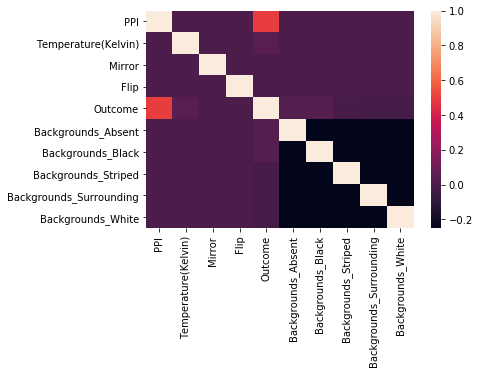

In [69]:
sns.heatmap(encoded_df.corr())

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
X = encoded_df.iloc[:,:]
X = X.drop(['Outcome'],axis=1)
y = encoded_df['Outcome']

In [33]:
param_tree = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
grid_tree = GridSearchCV(DecisionTreeClassifier(),param_tree,cv=5,return_train_score=False)
grid_tree.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [34]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [35]:
tree_df = pd.DataFrame(grid_tree.cv_results_)

In [36]:
tree_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004587,4.875607e-04,0.001993,1.089272e-03,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.66,0.71,1.0,0.47,0.97,0.762,0.199138,36
1,0.003581,4.879691e-04,0.001406,4.883495e-04,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
2,0.002992,1.784161e-07,0.000997,1.507891e-07,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
3,0.011569,1.715426e-02,0.000997,2.611745e-07,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
4,0.003590,4.885582e-04,0.001197,3.988505e-04,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
5,0.003391,4.886360e-04,0.001396,4.886166e-04,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
6,0.003790,3.978968e-04,0.001197,3.988981e-04,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
7,0.003590,4.884414e-04,0.001396,4.885387e-04,gini,11,"{'criterion': 'gini', 'max_depth': 11}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
8,0.003790,3.986359e-04,0.001396,4.885776e-04,gini,12,"{'criterion': 'gini', 'max_depth': 12}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2
9,0.003790,3.988505e-04,0.001197,3.990889e-04,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.66,1.00,1.0,0.73,0.80,0.838,0.139485,2


In [42]:
model5 = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=42)
clf_tree = model5.fit(X,y)

In [44]:
feature = ['PPI','Temperature(Kelvin)','Mirror','Flip','Backgrounds_absent','Backgrounds_black','Backgrounds_striped','Backgrounds_sorroundin','Backgrounds_white']

In [45]:
target = ['Outcome']

[Text(279.0, 747.4499999999999, 'X[0] <= 122.3\nentropy = 0.998\nsamples = 1000\nvalue = [528, 472]'),
 Text(186.0, 611.55, 'entropy = 0.0\nsamples = 300\nvalue = [300, 0]'),
 Text(372.0, 611.55, 'X[0] <= 321.15\nentropy = 0.91\nsamples = 700\nvalue = [228, 472]'),
 Text(279.0, 475.65, 'X[0] <= 250.77\nentropy = 0.994\nsamples = 500\nvalue = [228, 272]'),
 Text(186.0, 339.74999999999994, 'X[0] <= 183.395\nentropy = 0.904\nsamples = 400\nvalue = [128, 272]'),
 Text(93.0, 203.8499999999999, 'entropy = 0.0\nsamples = 100\nvalue = [0, 100]'),
 Text(279.0, 203.8499999999999, 'X[0] <= 244.61\nentropy = 0.984\nsamples = 300\nvalue = [128, 172]'),
 Text(186.0, 67.94999999999993, 'entropy = 0.943\nsamples = 200\nvalue = [128, 72]'),
 Text(372.0, 67.94999999999993, 'entropy = 0.0\nsamples = 100\nvalue = [0, 100]'),
 Text(372.0, 339.74999999999994, 'entropy = 0.0\nsamples = 100\nvalue = [100, 0]'),
 Text(465.0, 475.65, 'entropy = 0.0\nsamples = 200\nvalue = [0, 200]')]

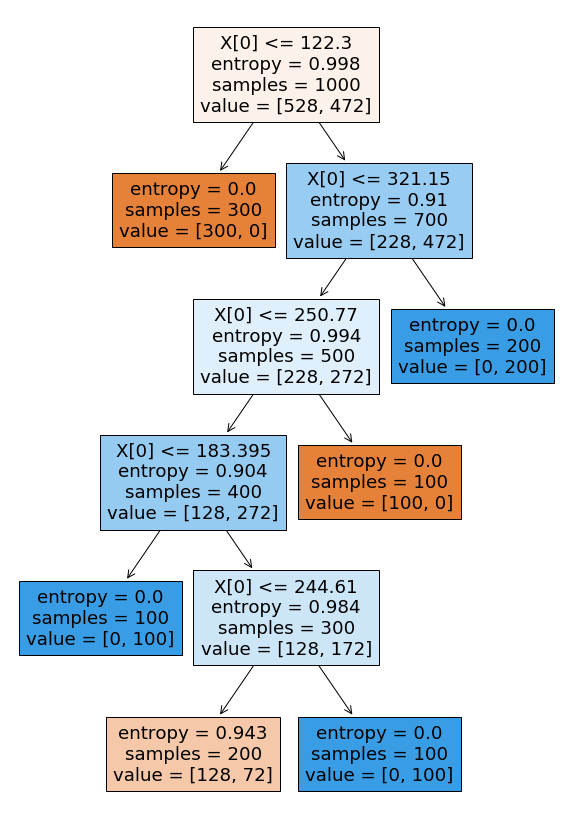

In [51]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(clf_tree,filled=True)

In [50]:
print(tree.export_text(clf_tree))

|--- feature_0 <= 122.30
|   |--- class: 0
|--- feature_0 >  122.30
|   |--- feature_0 <= 321.15
|   |   |--- feature_0 <= 250.77
|   |   |   |--- feature_0 <= 183.39
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  183.39
|   |   |   |   |--- feature_0 <= 244.61
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  244.61
|   |   |   |   |   |--- class: 1
|   |   |--- feature_0 >  250.77
|   |   |   |--- class: 0
|   |--- feature_0 >  321.15
|   |   |--- class: 1

